In [1]:
from audiointerp.dataset.esc50 import ESC50dataset
from audiointerp.model.cnn14 import TransferCnn14
from audiointerp.fit import Trainer, plot_learning_curves
from audiointerp.processing.spectrogram import LogMelSTFTSpectrogram, plot_spec
import torch.nn as nn
import torch.optim as optim
import torchaudio.transforms as T_audio
import torch

In [2]:
root_dir = "/root/ESC50"
# root_dir = "/home/yuliya/ESC50"
sr = 32000
train_folds = [1, 2, 3]
valid_folds = [4]
test_folds = [5]

In [3]:
n_fft = 1024
hop_length = 320
win_length = 1024
n_mels = 64
f_min = 50
f_max = 14000
top_db = None

In [4]:
feature_extractor = LogMelSTFTSpectrogram(
    n_fft=n_fft, win_length=win_length, hop_length=hop_length,
    sample_rate=sr, n_mels=n_mels, f_min=f_min, f_max=f_max, top_db=top_db,
    return_phase=False, return_full_db=False
)

In [5]:
feature_augs = nn.Sequential(
    T_audio.FrequencyMasking(10),
    T_audio.TimeMasking(20)
)

In [6]:
train_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=train_folds, normalize="peak", feature_extractor=feature_extractor, feature_augs=feature_augs)
valid_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=valid_folds, normalize="peak", feature_extractor=feature_extractor)
test_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=test_folds, normalize="peak", feature_extractor=feature_extractor)

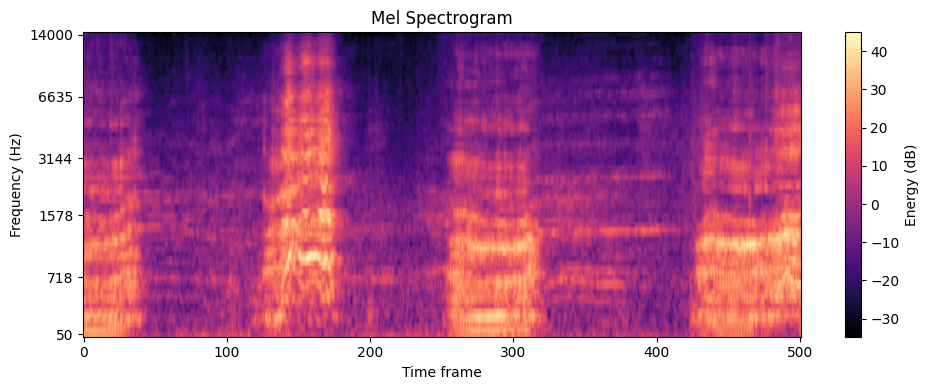

In [7]:
plot_spec(test_data[0][0], sample_rate=sr, fmin=f_min, fmax=f_max)

In [8]:
train_loader_kwargs = {"batch_size": 32, "shuffle": True}
valid_loader_kwargs = {"batch_size": 32, "shuffle": False}
test_loader_kwargs = {"batch_size": 32, "shuffle": False}

In [9]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1")
model_cls = TransferCnn14
model_kwargs = {"num_classes": 50, "num_bins": 64}
model_pretrain_weights_path = "weights/Cnn14_mAP=0.431.pth"

optimizer_cls = optim.Adam
optimizer_kwargs = {"lr": 1e-4}

criterion_cls = nn.CrossEntropyLoss
use_mixup = False
mixup_alpha = 0.0

In [10]:
model_trainer = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs,
    use_mixup=use_mixup,
    mixup_alpha=mixup_alpha
)

Random seed set to: 42


In [11]:
train_losses, train_accs, val_losses, val_accs, test_loss, test_acc = model_trainer.train(num_epochs=20, save_weights_path="logmel_cnn14.pth")

Epoch:   5%|███▊                                                                         | 1/20 [00:17<05:35, 17.68s/it]

Train Loss: 3.8521, Train Acc: 0.0483
Valid Loss: 3.7018, Valid Acc: 0.2150


Epoch:  10%|███████▋                                                                     | 2/20 [00:34<05:13, 17.41s/it]

Train Loss: 3.4763, Train Acc: 0.1942
Valid Loss: 2.8851, Valid Acc: 0.5725


Epoch:  15%|███████████▌                                                                 | 3/20 [00:52<04:54, 17.31s/it]

Train Loss: 2.3768, Train Acc: 0.4408
Valid Loss: 1.5622, Valid Acc: 0.7625


Epoch:  20%|███████████████▍                                                             | 4/20 [01:09<04:36, 17.28s/it]

Train Loss: 1.4286, Train Acc: 0.6117
Valid Loss: 0.7173, Valid Acc: 0.8575


Epoch:  25%|███████████████████▎                                                         | 5/20 [01:26<04:18, 17.25s/it]

Train Loss: 0.9546, Train Acc: 0.7158
Valid Loss: 0.5128, Valid Acc: 0.8900


Epoch:  30%|███████████████████████                                                      | 6/20 [01:43<04:01, 17.25s/it]

Train Loss: 0.6691, Train Acc: 0.7958
Valid Loss: 0.3955, Valid Acc: 0.9000


Epoch:  35%|██████████████████████████▉                                                  | 7/20 [02:01<03:45, 17.36s/it]

Train Loss: 0.5817, Train Acc: 0.8192
Valid Loss: 0.3462, Valid Acc: 0.9150


Epoch:  40%|██████████████████████████████▊                                              | 8/20 [02:18<03:28, 17.34s/it]

Train Loss: 0.4719, Train Acc: 0.8575
Valid Loss: 0.3139, Valid Acc: 0.9200


Epoch:  45%|██████████████████████████████████▋                                          | 9/20 [02:36<03:10, 17.35s/it]

Train Loss: 0.3636, Train Acc: 0.8950
Valid Loss: 0.2761, Valid Acc: 0.9225


Epoch:  50%|██████████████████████████████████████                                      | 10/20 [02:53<02:53, 17.39s/it]

Train Loss: 0.3332, Train Acc: 0.8900
Valid Loss: 0.2748, Valid Acc: 0.9225


Epoch:  55%|█████████████████████████████████████████▊                                  | 11/20 [03:11<02:37, 17.46s/it]

Train Loss: 0.2638, Train Acc: 0.9217
Valid Loss: 0.2658, Valid Acc: 0.9250


Epoch:  60%|█████████████████████████████████████████████▌                              | 12/20 [03:28<02:19, 17.45s/it]

Train Loss: 0.2672, Train Acc: 0.9108
Valid Loss: 0.2531, Valid Acc: 0.9225


Epoch:  65%|█████████████████████████████████████████████████▍                          | 13/20 [03:46<02:02, 17.49s/it]

Train Loss: 0.2167, Train Acc: 0.9283
Valid Loss: 0.2307, Valid Acc: 0.9300


Epoch:  70%|█████████████████████████████████████████████████████▏                      | 14/20 [04:03<01:45, 17.51s/it]

Train Loss: 0.1887, Train Acc: 0.9400
Valid Loss: 0.2267, Valid Acc: 0.9300


Epoch:  75%|█████████████████████████████████████████████████████████                   | 15/20 [04:21<01:27, 17.48s/it]

Train Loss: 0.1951, Train Acc: 0.9400
Valid Loss: 0.2237, Valid Acc: 0.9250


Epoch:  80%|████████████████████████████████████████████████████████████▊               | 16/20 [04:38<01:09, 17.45s/it]

Train Loss: 0.1747, Train Acc: 0.9467
Valid Loss: 0.2286, Valid Acc: 0.9275


Epoch:  85%|████████████████████████████████████████████████████████████████▌           | 17/20 [04:55<00:52, 17.43s/it]

Train Loss: 0.1591, Train Acc: 0.9458
Valid Loss: 0.2258, Valid Acc: 0.9250


Epoch:  90%|████████████████████████████████████████████████████████████████████▍       | 18/20 [05:13<00:34, 17.43s/it]

Train Loss: 0.1575, Train Acc: 0.9558
Valid Loss: 0.2265, Valid Acc: 0.9250


Epoch:  95%|████████████████████████████████████████████████████████████████████████▏   | 19/20 [05:30<00:17, 17.44s/it]

Train Loss: 0.1236, Train Acc: 0.9608
Valid Loss: 0.2315, Valid Acc: 0.9275


Epoch: 100%|████████████████████████████████████████████████████████████████████████████| 20/20 [05:48<00:00, 17.41s/it]


Train Loss: 0.1085, Train Acc: 0.9700
Valid Loss: 0.2183, Valid Acc: 0.9325
Best val Acc: 0.9325
Модель сохранена в logmel_cnn14.pth
Test Loss: 0.2639, Test Acc: 0.9225


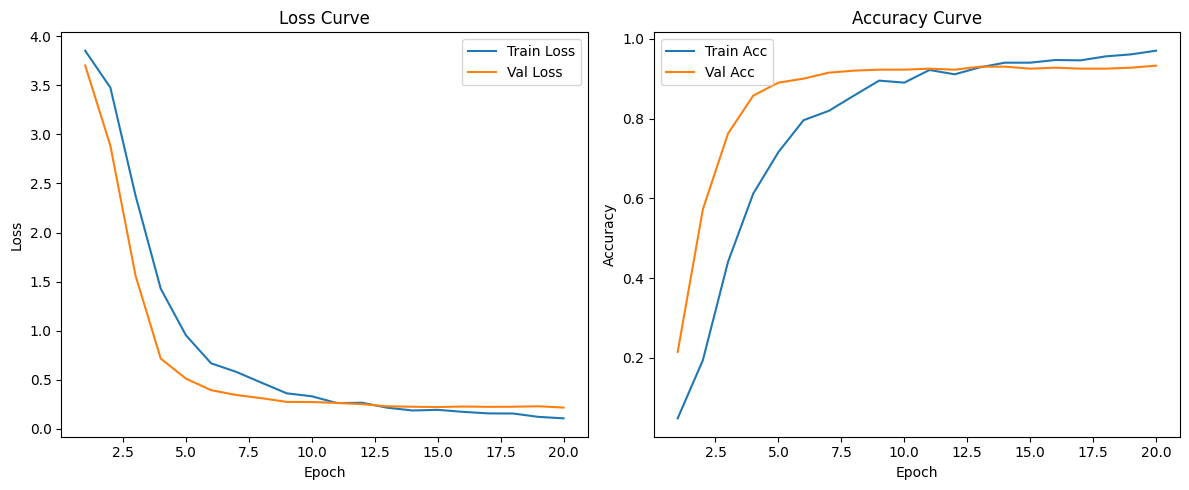

In [12]:
plot_learning_curves(train_losses=train_losses, train_accs=train_accs, val_losses=val_losses, val_accs=val_accs)

In [13]:
model_trainer.model.load_state_dict(torch.load("logmel_cnn14.pth"))

<All keys matched successfully>

In [14]:
model_trainer.test()

Test Loss: 0.2639, Test Acc: 0.9225


(0.2638887568563223, 0.9225)